In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [26]:
# Reading csv file
ds_data = pd.read_csv("data_science_salaries.csv.zip")

In [3]:
ds_data.head(10)

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
5,BI Developer,Mid-level,Full-time,On-site,2024,United States,62100,USD,62100,United States,Medium
6,Research Analyst,Entry-level,Full-time,On-site,2024,United States,250000,USD,250000,United States,Medium
7,Research Analyst,Entry-level,Full-time,On-site,2024,United States,150000,USD,150000,United States,Medium
8,Data Engineer,Executive-level,Full-time,Remote,2024,United States,219650,USD,219650,United States,Medium
9,Data Engineer,Executive-level,Full-time,Remote,2024,United States,136000,USD,136000,United States,Medium


In [5]:
ds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11087 entries, 0 to 11086
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           11087 non-null  object
 1   experience_level    11087 non-null  object
 2   employment_type     11087 non-null  object
 3   work_models         11087 non-null  object
 4   work_year           11087 non-null  int64 
 5   employee_residence  11087 non-null  object
 6   salary              11087 non-null  int64 
 7   salary_currency     11087 non-null  object
 8   salary_in_usd       11087 non-null  int64 
 9   company_location    11087 non-null  object
 10  company_size        11087 non-null  object
dtypes: int64(3), object(8)
memory usage: 952.9+ KB


In [6]:
ds_data['company_location'].str.split(',').str[0]

0        United States
1        United States
2        United States
3        United States
4        United States
             ...      
11082           Canada
11083           Canada
11084           Canada
11085          Austria
11086          Austria
Name: company_location, Length: 11087, dtype: object

In [7]:
# NAN values
ds_data.isna().sum()

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

In [8]:
ds_copy = ds_data.copy()

In [9]:
# Data Cleaning
duplicate_rows = ds_copy.duplicated()
print(ds_copy[duplicate_rows])

                job_title experience_level employment_type work_models  \
139     Research Engineer        Mid-level       Full-time     On-site   
173        Data Scientist        Mid-level       Full-time     On-site   
174        Data Scientist        Mid-level       Full-time     On-site   
175        Data Architect     Senior-level       Full-time     On-site   
193    Research Scientist     Senior-level       Full-time     On-site   
...                   ...              ...             ...         ...   
10702       Data Engineer        Mid-level       Full-time      Remote   
10757        Data Analyst     Senior-level       Full-time      Remote   
10758        Data Analyst     Senior-level       Full-time      Remote   
10845       Data Engineer        Mid-level       Full-time      Remote   
10987      Data Scientist        Mid-level       Full-time      Hybrid   

       work_year employee_residence  salary salary_currency  salary_in_usd  \
139         2024      United Stat

In [10]:
ds_copy = ds_copy.drop_duplicates()

In [11]:
ds_copy.shape

(6599, 11)

In [12]:
ds_copy['experience_level'].unique()
ds_copy['work_year'].unique()


array(['Mid-level', 'Senior-level', 'Entry-level', 'Executive-level'],
      dtype=object)

array([2024, 2023, 2022, 2021, 2020])

**EDA**

In [13]:
# how the salary has varied over the year for a entry level data scientist located in united states.
data1 = ds_copy.groupby(['job_title', 'experience_level','company_location']).get_group(('Data Scientist', 'Entry-level','United States'))
data1.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
675,Data Scientist,Entry-level,Full-time,On-site,2023,United States,100000,USD,100000,United States,Medium
676,Data Scientist,Entry-level,Full-time,On-site,2023,United States,70000,USD,70000,United States,Medium
709,Data Scientist,Entry-level,Full-time,On-site,2023,United States,113800,USD,113800,United States,Medium
710,Data Scientist,Entry-level,Full-time,On-site,2023,United States,63200,USD,63200,United States,Medium
1095,Data Scientist,Entry-level,Full-time,On-site,2023,United States,150000,USD,150000,United States,Medium


In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 675 to 11043
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           59 non-null     object
 1   experience_level    59 non-null     object
 2   employment_type     59 non-null     object
 3   work_models         59 non-null     object
 4   work_year           59 non-null     int64 
 5   employee_residence  59 non-null     object
 6   salary              59 non-null     int64 
 7   salary_currency     59 non-null     object
 8   salary_in_usd       59 non-null     int64 
 9   company_location    59 non-null     object
 10  company_size        59 non-null     object
dtypes: int64(3), object(8)
memory usage: 5.5+ KB


Text(0, 5, '$105,000')

Text(0, 5, '$428,000')

Text(0, 5, '$1,269,774')

Text(0, 5, '$4,276,667')

Text(0.5, 1.0, 'Total Salary Over Years for Entry Level Data Scientists in the United States')

Text(0.5, 0, 'Work Year')

Text(0, 0.5, 'Total Salary (USD)')

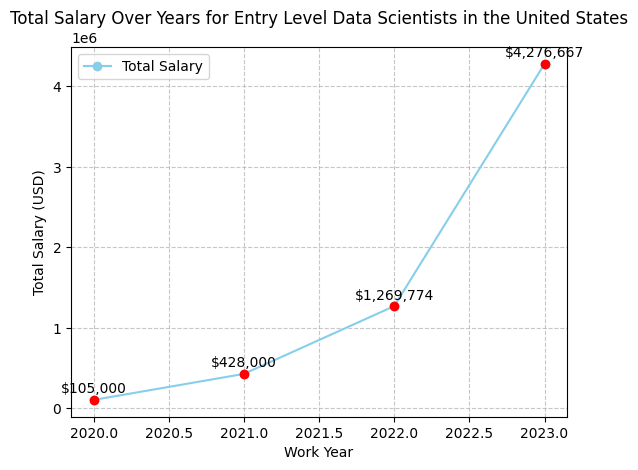

In [15]:
# Group by 'work_year' and calculate the sum of salaries for each year
total_salary_per_year = data1.groupby('work_year')['salary_in_usd'].sum().reset_index()

# Create a line graph for total salary per year with enhanced features
plt.plot(total_salary_per_year['work_year'], total_salary_per_year['salary_in_usd'], marker='o', linestyle='-', color='skyblue', label='Total Salary')

# Add markers
plt.scatter(total_salary_per_year['work_year'], total_salary_per_year['salary_in_usd'], color='red', zorder=5)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Add annotations for each data point
for i, txt in enumerate(total_salary_per_year['salary_in_usd']):
    plt.annotate(f"${txt:,}", (total_salary_per_year['work_year'][i], total_salary_per_year['salary_in_usd'][i]), textcoords="offset points", xytext=(0,5), ha='center')

# Add labels and title
plt.title('Total Salary Over Years for Entry Level Data Scientists in the United States')
plt.xlabel('Work Year')
plt.ylabel('Total Salary (USD)')

# Add legend
plt.legend()

# Show the line graph
plt.show()

In [16]:
# Average salary of data scientist by experience level
filtered_data_sci = ds_copy[ds_copy["job_title"] == "Data Scientist"]
filtered_data_sci = filtered_data_sci[filtered_data_sci["company_location"] == "United States"]
filtered_data_sci.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
12,Data Scientist,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
13,Data Scientist,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
16,Data Scientist,Mid-level,Full-time,On-site,2024,United States,85000,USD,85000,United States,Medium


In [17]:
# Calculate average salary for each experience level using groupby without a separate function
average_salary_by_level = filtered_data_sci.groupby('experience_level')['salary'].mean()

# Display the resulting average salaries
print(average_salary_by_level)

experience_level
Entry-level       103,041.37
Executive-level   193,717.50
Mid-level         147,178.22
Senior-level      173,910.01
Name: salary, dtype: float64


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 4 artists>

Text(0.5, 0, 'Experience Level')

Text(0, 0.5, 'Average Salary (USD)')

Text(0.5, 1.0, 'Average Salary of Data Scientists by Experience Level in the US')

([0, 1, 2, 3],
 [Text(0, 0, 'Entry-level'),
  Text(1, 0, 'Executive-level'),
  Text(2, 0, 'Mid-level'),
  Text(3, 0, 'Senior-level')])

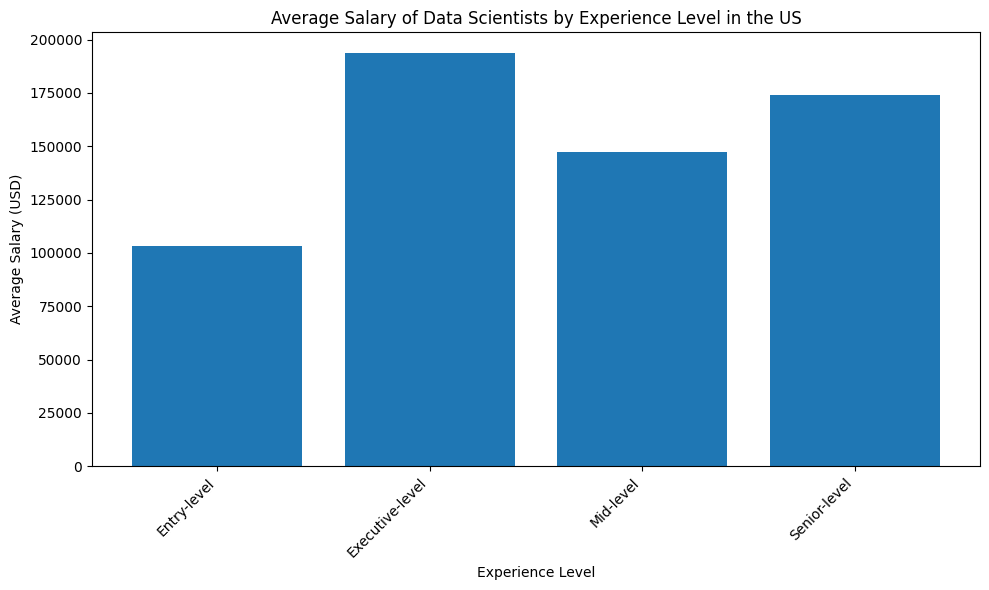

In [18]:
# Prepare data for the histogram
experience_levels = average_salary_by_level.index.to_list()
average_salaries = average_salary_by_level.to_list()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(experience_levels, average_salaries)

# Add labels and title
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.title("Average Salary of Data Scientists by Experience Level in the US")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.tight_layout()
plt.show()

In [19]:
filtered_data_sci.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 2 to 11043
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           999 non-null    object
 1   experience_level    999 non-null    object
 2   employment_type     999 non-null    object
 3   work_models         999 non-null    object
 4   work_year           999 non-null    int64 
 5   employee_residence  999 non-null    object
 6   salary              999 non-null    int64 
 7   salary_currency     999 non-null    object
 8   salary_in_usd       999 non-null    int64 
 9   company_location    999 non-null    object
 10  company_size        999 non-null    object
dtypes: int64(3), object(8)
memory usage: 93.7+ KB


In [20]:
#Drop column

filtered_data_sci.drop(columns=["salary", "salary_currency"], axis=1, inplace=True)
filtered_data_sci.head()


,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary_in_usd,company_location,company_size
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,United States,Medium
12,Data Scientist,Mid-level,Full-time,Remote,2024,United States,148100,United States,Medium
13,Data Scientist,Mid-level,Full-time,Remote,2024,United States,98700,United States,Medium
16,Data Scientist,Mid-level,Full-time,On-site,2024,United States,85000,United States,Medium


In [21]:
#Dataframe
X = filtered_data_sci.drop('salary_in_usd', axis=1)
y = filtered_data_sci['salary_in_usd']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)

(799, 200, 799, 200)

In [23]:
# Define the preprocessing steps
categorical_features = ['job_title', 'experience_level', 'employment_type', 'work_models', 'work_year', 'employee_residence', 'company_location', 'company_size']

# Use ColumnTransformer to apply different preprocessing steps to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['work_year']),  # Numeric feature(s)
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Categorical feature(s)
    ])


In [25]:
# Use a more complex model (Random Forest) for comparison
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train and evaluate Random Forest
random_forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                          ('model', random_forest_model)])

random_forest_pipeline.fit(X_train, y_train)
y_pred_rf = random_forest_pipeline.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')

# Use Linear Regression
linear_model = LinearRegression()

# Create a pipeline with preprocessing and modeling steps
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', linear_model)])

# Train and evaluate Linear Regression
linear_pipeline.fit(X_train, y_train)
y_pred_linear = linear_pipeline.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Mean Squared Error (Linear Regression): {mse_linear}')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['work_year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job_title',
                                                   'experience_level',
                                                   'employment_type',
                                                   'work_models', 'work_year',
                                                   'employee_residence',
                                                   'company_location',
                                                   'company_size'])])),
                ('model', RandomForestRegressor(random_state=42))])

Mean Squared Error (Random Forest): 2792867854.4031916


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['work_year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job_title',
                                                   'experience_level',
                                                   'employment_type',
                                                   'work_models', 'work_year',
                                                   'employee_residence',
                                                   'company_location',
                                                   'company_size'])])),
                ('model', LinearRegression())])

Mean Squared Error (Linear Regression): 5.735095051391821e+29
